# Project Title:
### Predicting House Prices Using Machine Learning



# Dataset Features Description

* **price:** The price of the house (in Indian Rupees, INR). This is the target variable for prediction.

* **area:** The area of the house in square feet.

* **bedrooms:** The number of bedrooms in the house.

* **bathrooms:** The number of bathrooms in the house.

* **stories:** The number of stories/floors in the house.

* **mainroad:** Whether the house is connected to the main road (yes or no).

* **guestroom:** Whether the house has a guest room (yes or no).

* **basement:** Whether the house has a basement (yes or no).

* **hotwaterheating:** Whether the house has a hot water heating system (yes or no).

* **airconditioning:** Whether the house has air conditioning (yes or no).

* **parking:** The number of parking spaces available.

* **prefarea:** Whether the house is located in a preferred area (yes or no).


* **Furnished:** Fully equipped with furniture (beds, sofas, wardrobes, etc.).

* **Semi-Furnished:** Partially equipped (basic items like fans/lights but no full furniture).

* **Unfurnished:** Empty, no furniture or appliances included.


##  Import Libraries

In [2]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings 
warnings.filterwarnings('ignore')


# Load the Housing dataset

In [4]:
# Load the data
df = pd.read_csv('Housing.csv')
print("First few rows:")
df.head(10)


First few rows:


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


# Information of dataset

In [6]:
 df.shape

(545, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


# Check the Column names

In [9]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

# Check the missing value

In [11]:

# Check for missing values
print("\
Missing values per column:")
print(df.isnull().sum())

Missing values per column:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


# Check the duplicate values

In [13]:
# check the duplicate values
df.duplicated().sum()


0

# Summary statistics

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


# Correlation matrix 

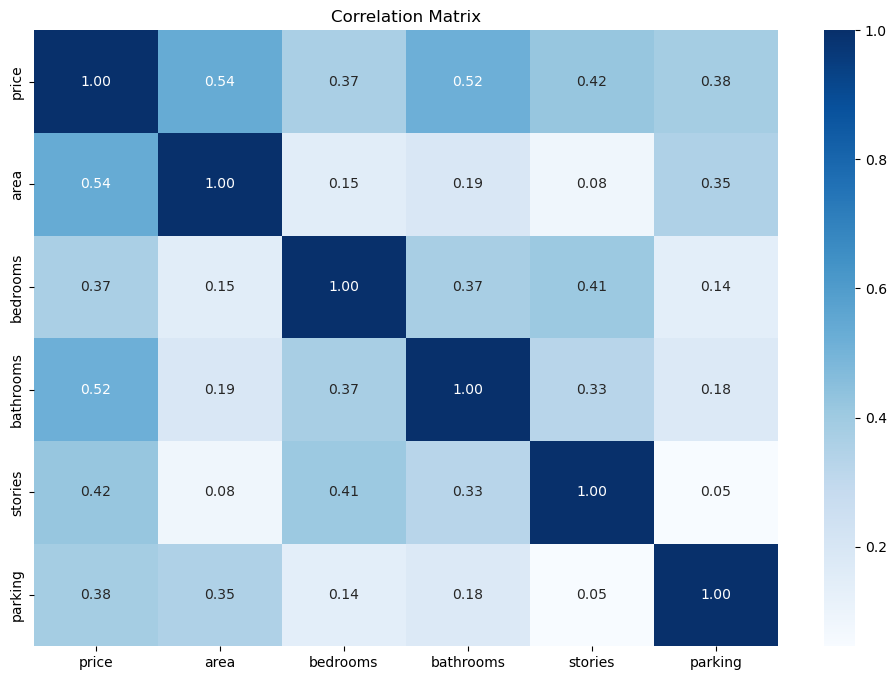

In [17]:
# Correlation matrix 
plt.figure(figsize=(12, 8))
corr_matrix = df.corr(numeric_only=True)

# plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

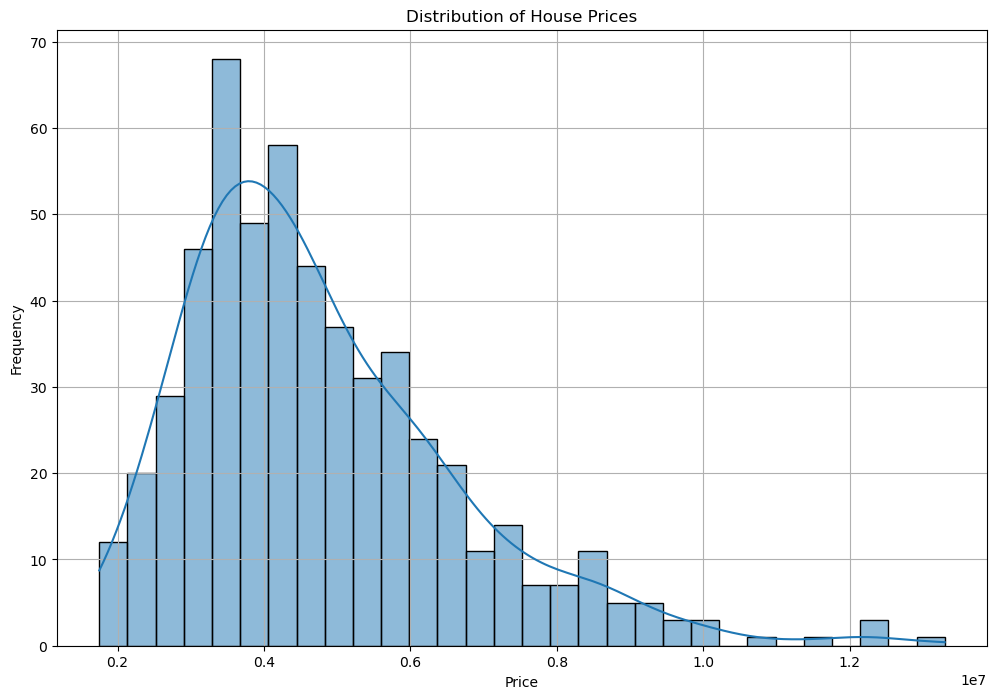

In [19]:

# Plot the distribution of house prices
plt.figure(figsize=(12, 8))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid()
plt.show()



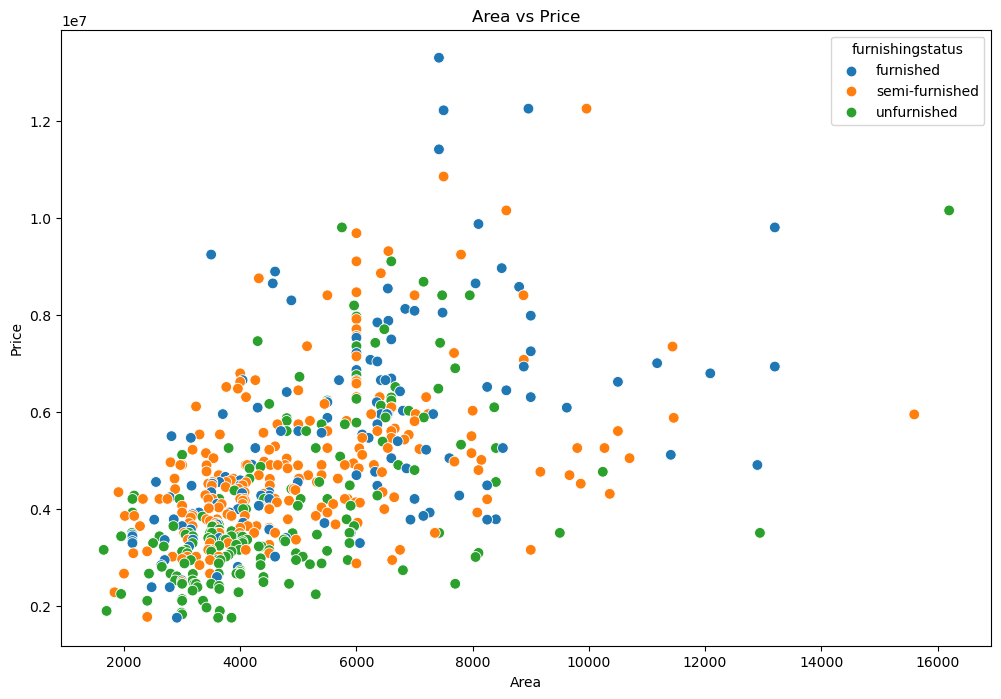

In [20]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='area', y='price',hue='furnishingstatus',s=60)
plt.title('Area vs Price')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

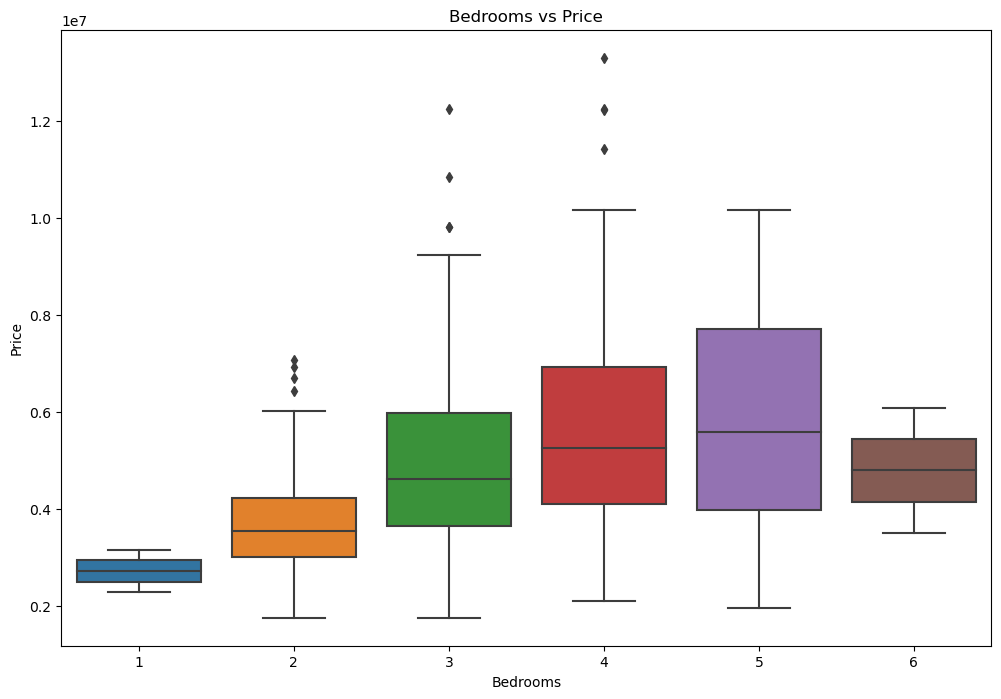

In [21]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='bedrooms', y='price')
plt.title('Bedrooms vs Price')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()

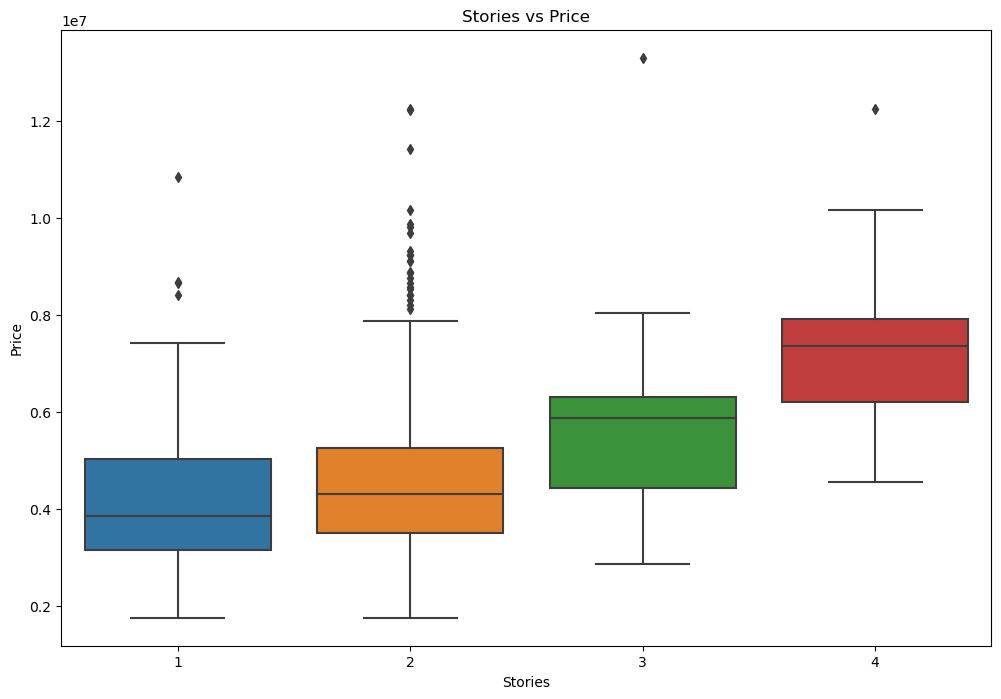

In [22]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='stories', y='price')
plt.title('Stories vs Price')
plt.xlabel('Stories')
plt.ylabel('Price')
plt.show()

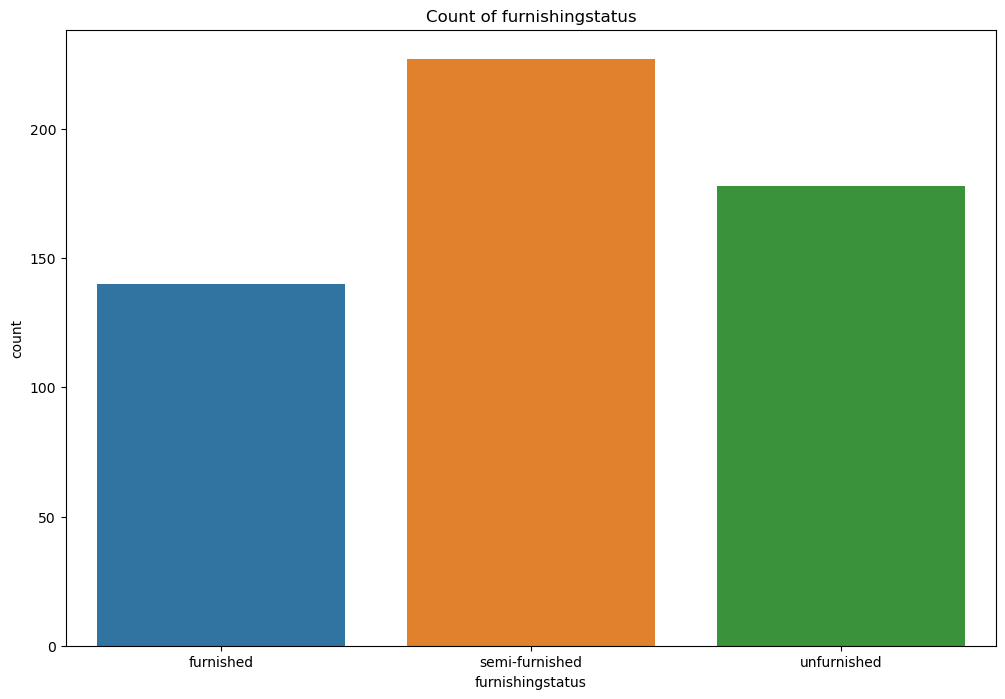

In [23]:
import seaborn as sns

plt.figure(figsize=(12,8))
sns.countplot(data=df, x=df['furnishingstatus'])
plt.title("Count of furnishingstatus")
plt.show()

# Convert yes/no to 1/0

In [26]:
# Convert yes/no to 1/0
yes_no_cols = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']
df[yes_no_cols] = df[yes_no_cols].replace({'yes':1, 'no':0})

# One-Hot Encoding to categorical columns

In [32]:
# One-hot encode furnishingstatus
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

In [34]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,False,True
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,True,False
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,False,True
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,False,False


# Define independent variables (X) and dependent variable (Y)

In [38]:
# Separate features and target
X = df.drop('price', axis=1)
y = df['price']

# Split Data into Training & Testing Sets

In [223]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [225]:
# Check shape
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (408, 13)
Test shape: (137, 13)


# LinearRegression Model

In [228]:
# Train XGBoost Model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [230]:
# Predict on Test Data
y_pred = lr.predict(X_test)

# Evaluate Performance
r2 = r2_score(y_test, y_pred)
print(f"LinearRegression model R² Score: {r2:.4f}")

LinearRegression model R² Score: 0.6631


# DecisionTreeRegressor Model

In [234]:
# Train XGBoost Model
dtr = DecisionTreeRegressor(max_depth=10, random_state=42)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, random_state=42)

In [236]:
# Predict on Test Data
y_pred = dtr.predict(X_test)

# Evaluate Performance
r2 = r2_score(y_test, y_pred)
print(f" DecisionTreeRegressor model R² Score: {r2:.4f}")

 DecisionTreeRegressor model R² Score: 0.3217


# RandomForestRegressor Model

In [240]:
# Train XGBoost Model
rfr =  RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=42)

In [241]:
# Predict on Test Data
y_pred = rfr.predict(X_test)

# Evaluate Performance
r2 = r2_score(y_test, y_pred)
print(f" DecisionTreeRegressor model R² Score: {r2:.4f}")

 DecisionTreeRegressor model R² Score: 0.5708


# XGBRegressor Model

In [246]:
# Train XGBoost Model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [248]:
# Predict on Test Data
y_pred = xgb_model.predict(X_test)

# Evaluate Performance
r2 = r2_score(y_test, y_pred)
print(f"XGBoost R² Score: {r2:.4f}")

XGBoost R² Score: 0.5492


# Defining & Training  All The Model For Choosing the Best Model

In [252]:
# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(max_depth=10, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
}

In [254]:
# Train models and store R² scores
scores = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores[name] = r2_score(y_test, y_pred)

# Evaluate the Model

In [257]:
# Convert scores to DataFrame
scores_df = pd.DataFrame(list(scores.items()), columns=["Model", "R² Score"]).sort_values(by="R² Score", ascending=False)
scores_df

,Model,R² Score
0,Linear Regression,0.663128
2,Random Forest,0.570756
3,XGBoost,0.549225
1,Decision Tree,0.321716


# Model Performance

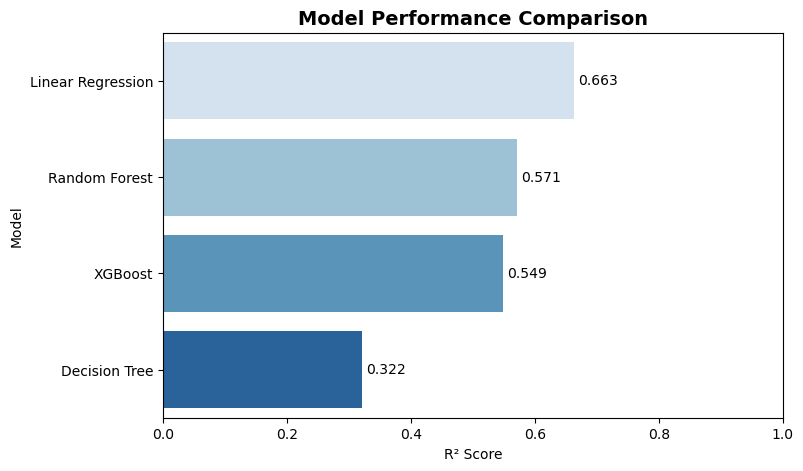

In [87]:
# Plot Model Performance
plt.figure(figsize=(8, 5))
ax = sns.barplot(x="R² Score", y="Model", data=scores_df, palette="Blues")

# Add annotations (R² Score on bars)
for container in ax.containers:
    ax.bar_label(container, fmt="%.3f", fontsize=10, color="black", padding=3)

# Set title and limits
plt.title("Model Performance Comparison", fontsize=14, fontweight="bold")
plt.xlim(0, 1)  # R² score range

# Show plot
plt.show()

# Choose The Best Model
* LinearRegression Model is the best model for batter prediction

###  Training LinearRegression with Optimized Hyperparameters

In [92]:
# Train LinearRegression Model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [94]:
# Predict on Test Data
y_pred = lr.predict(X_test)

# Evaluate Performance
r2 = r2_score(y_test, y_pred)
print(f"LinearRegression model R² Score: {r2:.4f}")

LinearRegression model R² Score: 0.6631


# Predict New House price

In [97]:
# Function to predict price
def predict_price(area, bedrooms, bathrooms, stories, mainroad, guestroom, 
                 basement, hotwaterheating, airconditioning, parking, prefarea, 
                 furnishingstatus):
    
    # Create input dictionary
    input_data = {
        'area': area,
        'bedrooms': bedrooms,
        'bathrooms': bathrooms,
        'stories': stories,
        'mainroad': 1 if mainroad.lower() == 'yes' else 0,
        'guestroom': 1 if guestroom.lower() == 'yes' else 0,
        'basement': 1 if basement.lower() == 'yes' else 0,
        'hotwaterheating': 1 if hotwaterheating.lower() == 'yes' else 0,
        'airconditioning': 1 if airconditioning.lower() == 'yes' else 0,
        'parking': parking,
        'prefarea': 1 if prefarea.lower() == 'yes' else 0,
        'furnishingstatus_semi-furnished': 1 if furnishingstatus.lower() == 'semi-furnished' else 0,
        'furnishingstatus_unfurnished': 1 if furnishingstatus.lower() == 'unfurnished' else 0
    }
    
    # Convert to DataFrame
    input_df = pd.DataFrame([input_data], columns=X.columns)
    
    # Predict
    price = lr.predict(input_df)[0]
    return price

# Example prediction
predicted_price = predict_price(
    area=8000,
    bedrooms=4,
    bathrooms=2,
    stories=3,
    mainroad='yes',
    guestroom='yes',
    basement='no',
    hotwaterheating='no',
    airconditioning='yes',
    parking=2,
    prefarea='yes',
    furnishingstatus='furnished'
)

print(f"\nPredicted Price: {predicted_price:,.2f}")


Predicted Price: 8,444,338.16


# Run The Model in Streamlit Web App

In [131]:
joblib.dump(X.columns.tolist(), "X_columns.pkl")

['X_columns.pkl']

In [133]:
%%writefile app.py
import streamlit as st
import numpy as np
import pandas as pd
import joblib

st.set_page_config(page_title="Housing Price Predictor", page_icon="🏡")
st.title("🏡 Housing Price Predictor")

# Load trained model and data structure
model = joblib.load("model.pkl")
X = joblib.load("X_columns.pkl")  # Assumes you saved the columns used in training

# Input toggle
input_method = st.radio("Choose input method:", ["Use sliders", "Enter values manually"])
st.sidebar.header("🏠 House Features")

def get_inputs(method):
    if method == "Use sliders":
        area = st.sidebar.slider("Area", 500, 10000, 2000)
        bedrooms = st.sidebar.slider("Bedrooms", 1, 10, 3)
        bathrooms = st.sidebar.slider("Bathrooms", 1, 10, 2)
        stories = st.sidebar.slider("Stories", 1, 4, 1)
        mainroad = st.sidebar.selectbox("Main Road Access", ["Yes", "No"])
        guestroom = st.sidebar.selectbox("Guest Room", ["Yes", "No"])
        basement = st.sidebar.selectbox("Basement", ["Yes", "No"])
        hotwaterheating = st.sidebar.selectbox("Hot Water Heating", ["Yes", "No"])
        airconditioning = st.sidebar.selectbox("Air Conditioning", ["Yes", "No"])
        parking = st.sidebar.slider("Parking", 0, 5, 1)
        prefarea = st.sidebar.selectbox("Preferred Area", ["Yes", "No"])
        furnishingstatus = st.sidebar.selectbox("Furnishing Status", ["furnished", "semi-furnished", "unfurnished"])
    else:
        area = float(st.sidebar.text_input("Area", "2000"))
        bedrooms = int(st.sidebar.text_input("Bedrooms", "3"))
        bathrooms = int(st.sidebar.text_input("Bathrooms", "2"))
        stories = int(st.sidebar.text_input("Stories", "1"))
        mainroad = st.sidebar.text_input("Main Road Access (Yes/No)", "Yes")
        guestroom = st.sidebar.text_input("Guest Room (Yes/No)", "No")
        basement = st.sidebar.text_input("Basement (Yes/No)", "No")
        hotwaterheating = st.sidebar.text_input("Hot Water Heating (Yes/No)", "No")
        airconditioning = st.sidebar.text_input("Air Conditioning (Yes/No)", "Yes")
        parking = int(st.sidebar.text_input("Parking", "1"))
        prefarea = st.sidebar.text_input("Preferred Area (Yes/No)", "Yes")
        furnishingstatus = st.sidebar.text_input("Furnishing Status (furnished/semi-furnished/unfurnished)", "semi-furnished")

    # Binary mapping
    binary_map = {"Yes": 1, "No": 0}
    mainroad = binary_map.get(mainroad, 0)
    guestroom = binary_map.get(guestroom, 0)
    basement = binary_map.get(basement, 0)
    hotwaterheating = binary_map.get(hotwaterheating, 0)
    airconditioning = binary_map.get(airconditioning, 0)
    prefarea = binary_map.get(prefarea, 0)

    # Furnishing one-hot encoding
    furnishingstatus_semi = 1 if furnishingstatus == "semi-furnished" else 0
    furnishingstatus_un = 1 if furnishingstatus == "unfurnished" else 0

    input_dict = {
        'area': area,
        'bedrooms': bedrooms,
        'bathrooms': bathrooms,
        'stories': stories,
        'mainroad': mainroad,
        'guestroom': guestroom,
        'basement': basement,
        'hotwaterheating': hotwaterheating,
        'airconditioning': airconditioning,
        'parking': parking,
        'prefarea': prefarea,
        'furnishingstatus_semi-furnished': furnishingstatus_semi,
        'furnishingstatus_unfurnished': furnishingstatus_un
    }

    # Convert to DataFrame and align columns
    input_df = pd.DataFrame([input_dict])
    input_df = input_df.reindex(columns=X, fill_value=0)  # Ensure all features present
    return input_df

# Get inputs
features_df = get_inputs(input_method)

# Prediction
prediction = model.predict(features_df)[0]

st.subheader("📈 Predicted House Price:")
st.success(f"💰 Rs. {prediction:,.2f}")


Overwriting app.py


In [135]:
import subprocess
import sys

# Install streamlit if not installed
subprocess.check_call([sys.executable, "-m", "pip", "install", "streamlit"])

# Run the streamlit app
subprocess.Popen([sys.executable, "-m", "streamlit", "run", "app.py"])


<Popen: returncode: None args: ['C:\\ProgramData\\anaconda3\\python.exe', '-...>